In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [3]:
df = pd.read_csv("C:\\Users\\USER\\Downloads\\archive (7)\\Data_Train_Airline_Tickets2.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [6]:
df.isnull().sum()
df.loc[df.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [7]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [8]:
mode = df['Total_Stops'].mode()

In [9]:
df['Total_Stops'] = df.Total_Stops.fillna('1 stop')

In [10]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.describe(include='O')

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10683,10683,10683,10683,10683
unique,12,44,5,6,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,233,423,550,5626,8345


In [12]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
order = df['Airline'].value_counts().index.tolist()

### Analyze the number of Flights per Airline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways'),
  Text(1, 0, 'IndiGo'),
  Text(2, 0, 'Air India'),
  Text(3, 0, 'Multiple carriers'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'Vistara'),
  Text(6, 0, 'Air Asia'),
  Text(7, 0, 'GoAir'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

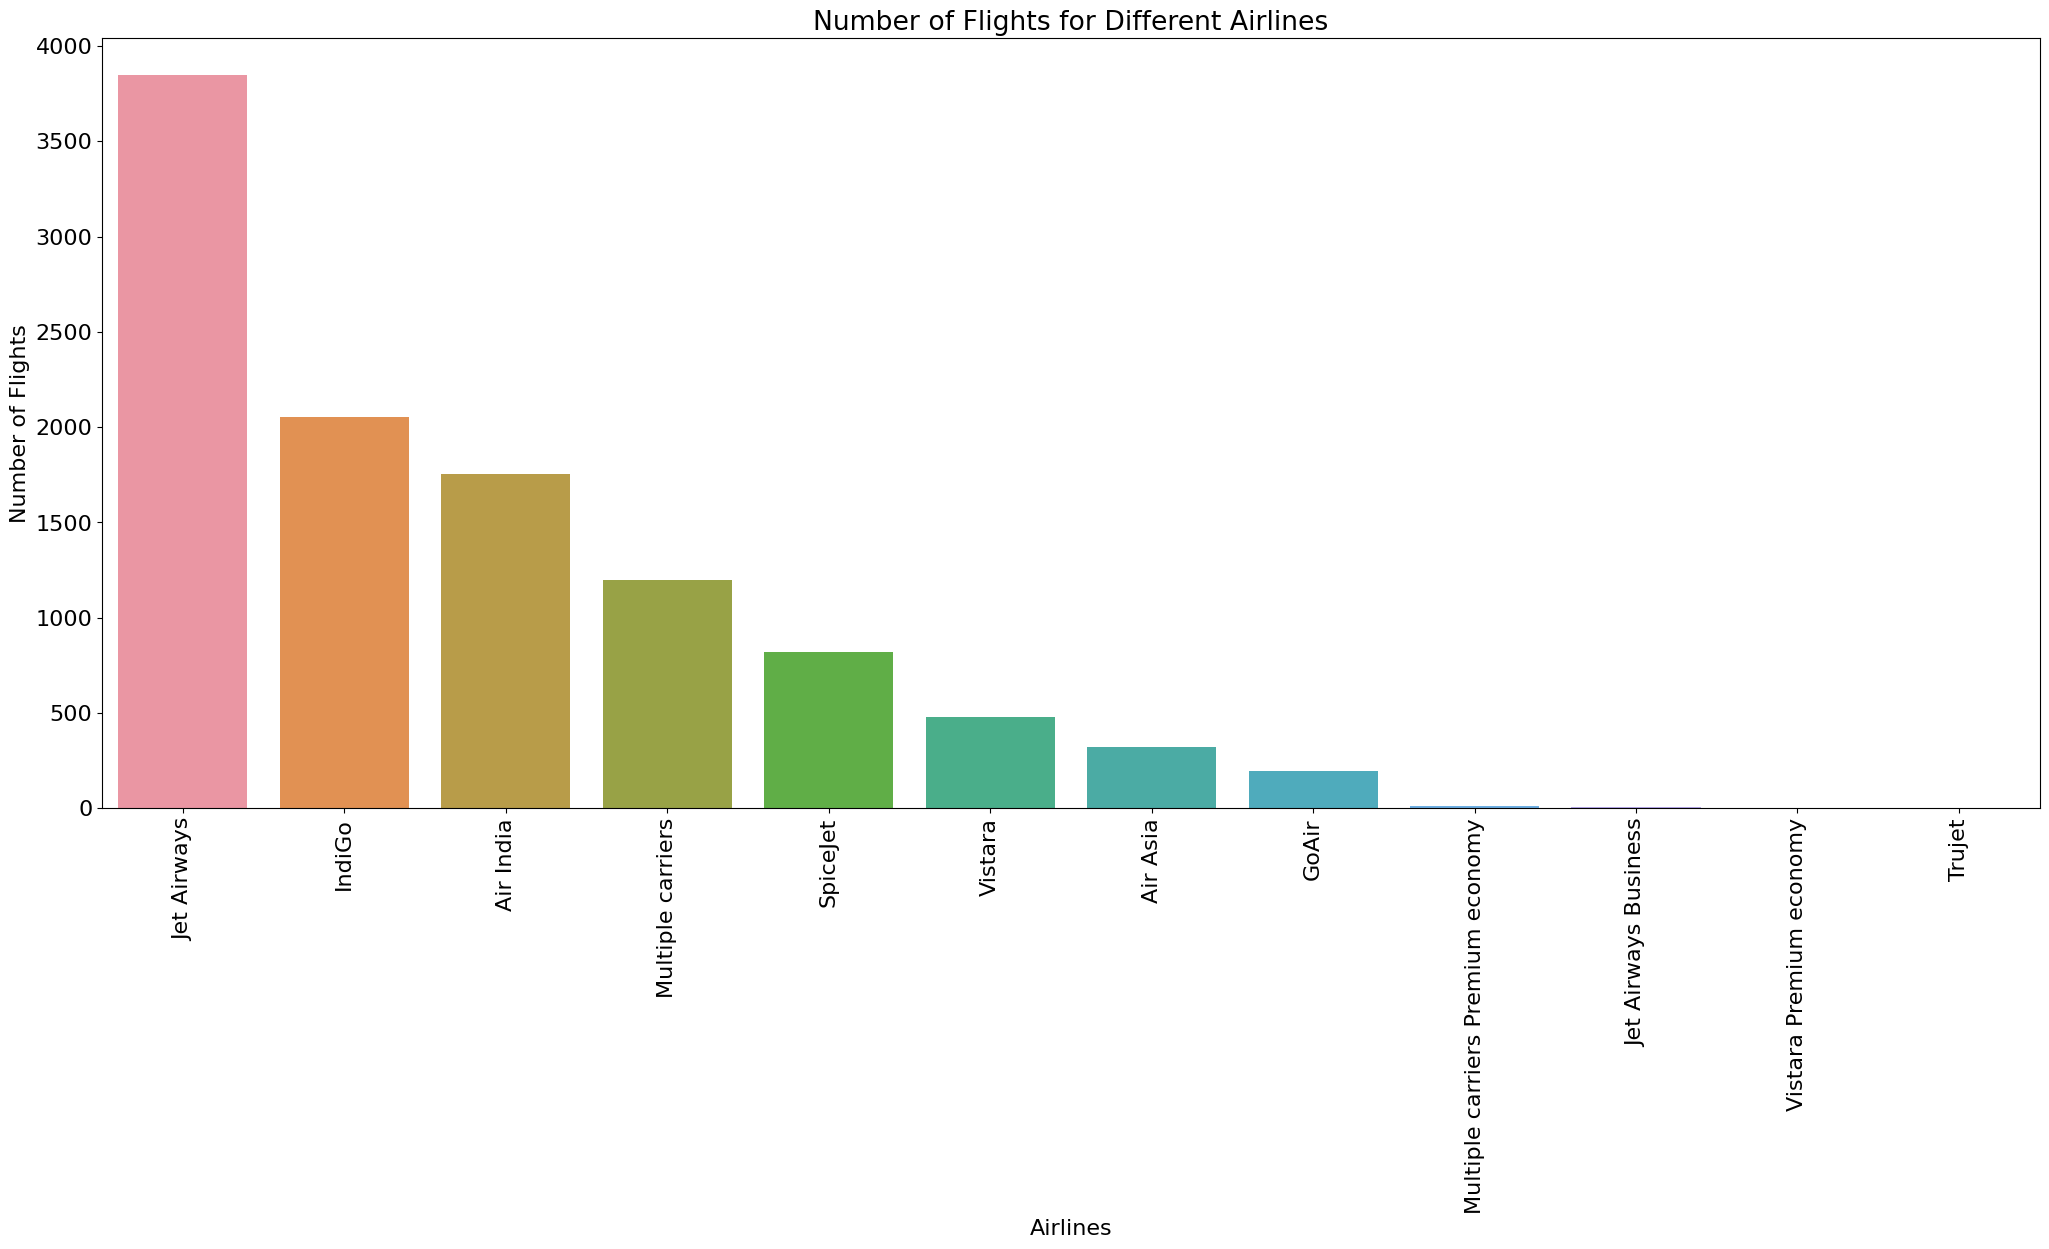

In [14]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size':16, 'font.weight':'normal'})
sns.countplot(data=df, x='Airline', order=order)
plt.xlabel('Airlines')
plt.ylabel('Number of Flights')
plt.title('Number of Flights for Different Airlines')
plt.xticks(rotation=90)

### Analyze price variation per airline

Text(0.5, 1.0, 'Airlines vs Price')

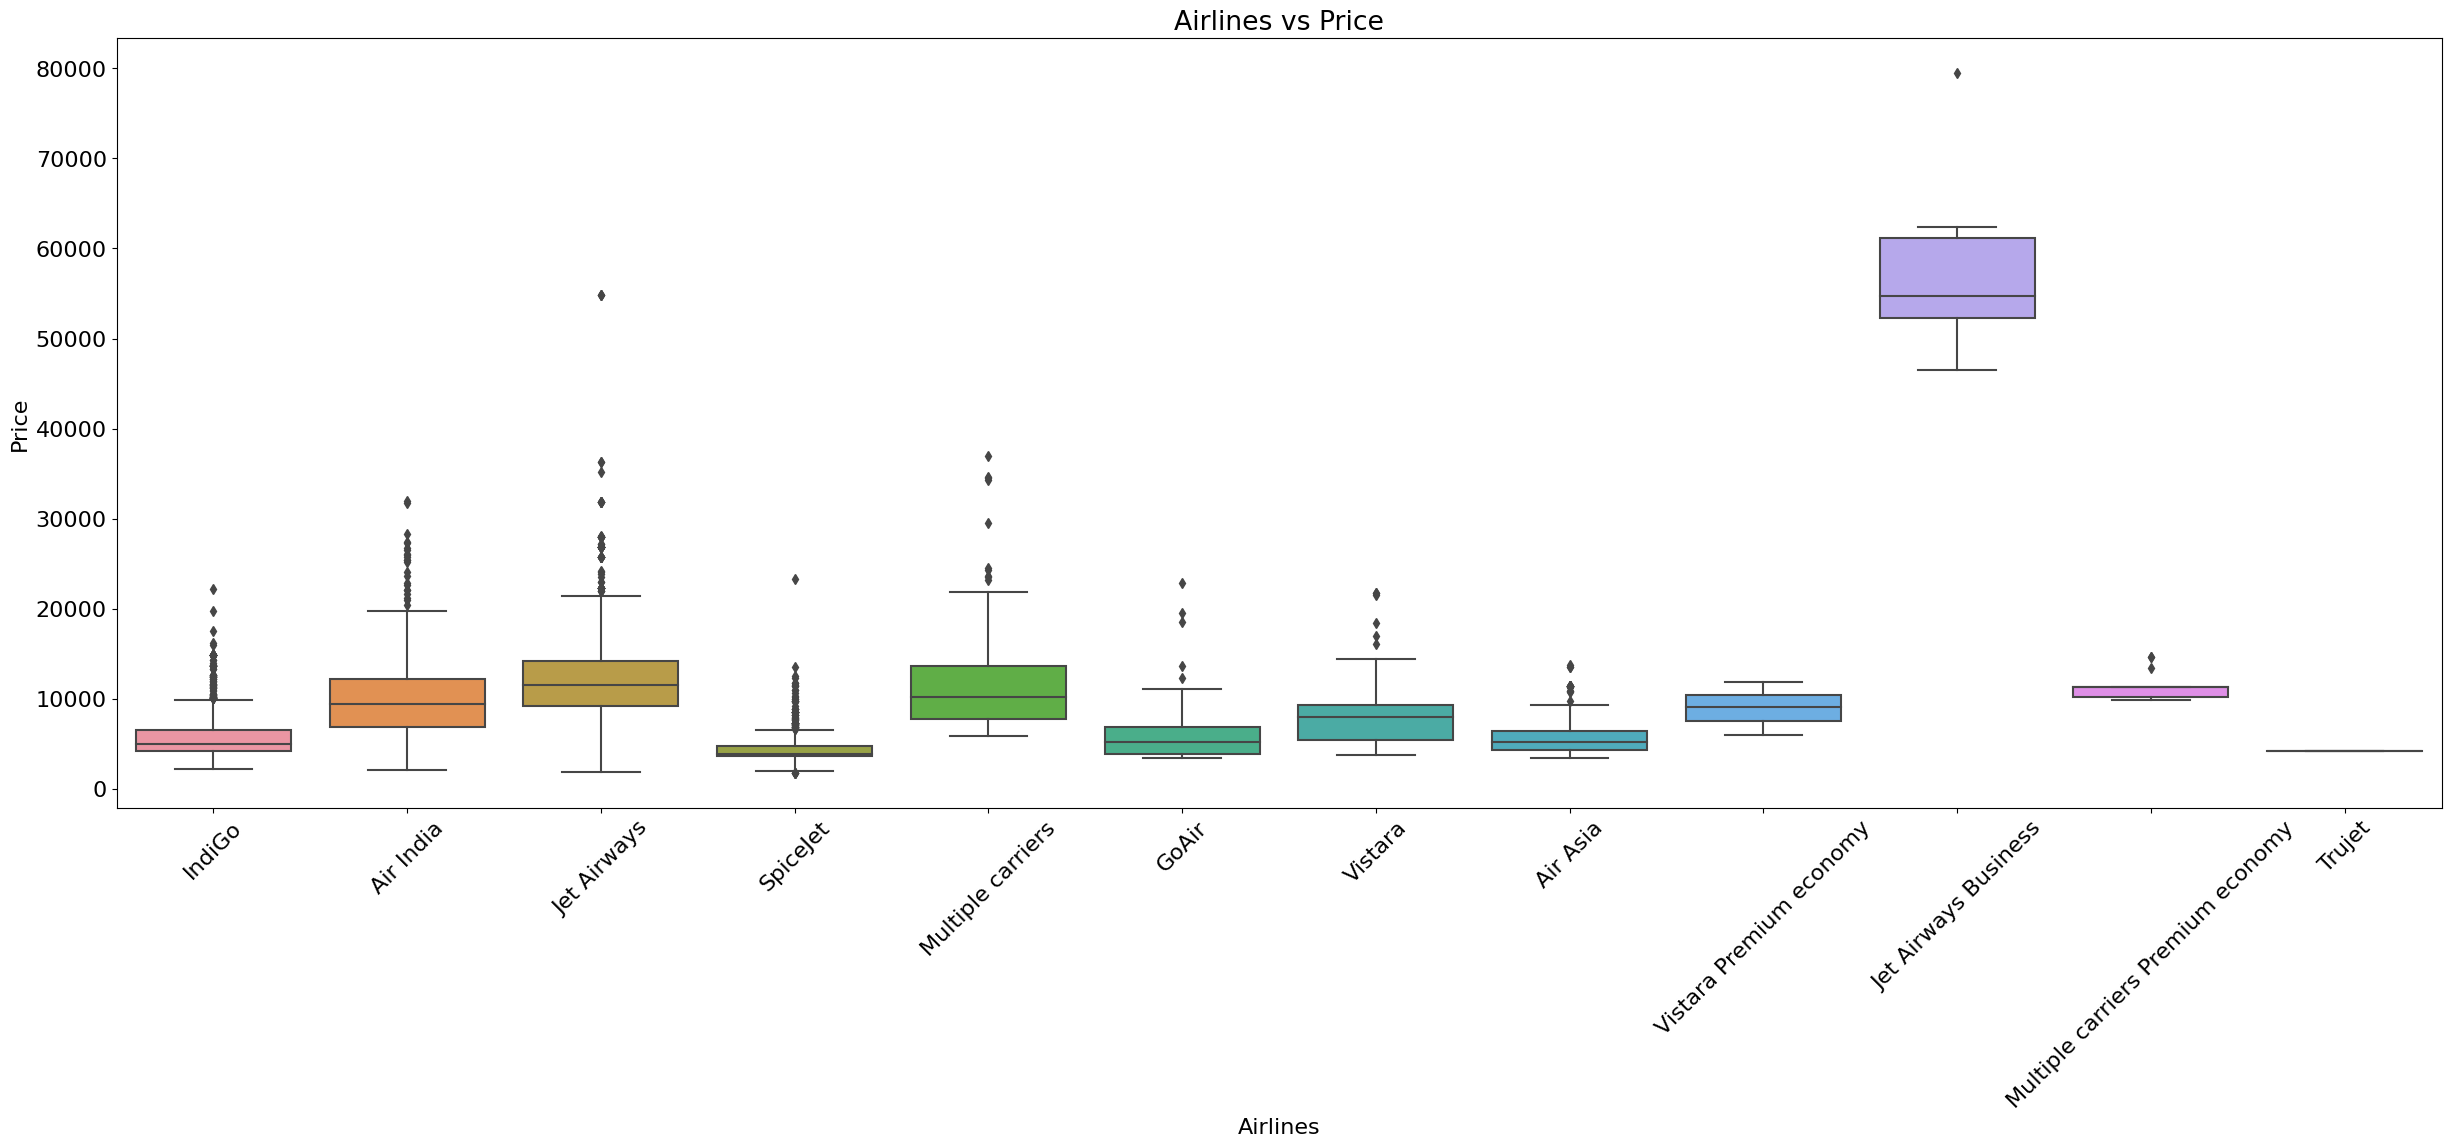

In [15]:
plt.figure(figsize=(30,10))
sns.boxplot(data=df, x='Airline', y='Price')
plt.xticks(rotation=45)
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Airlines vs Price')

Text(0.5, 1.0, 'Airlines vs Price')

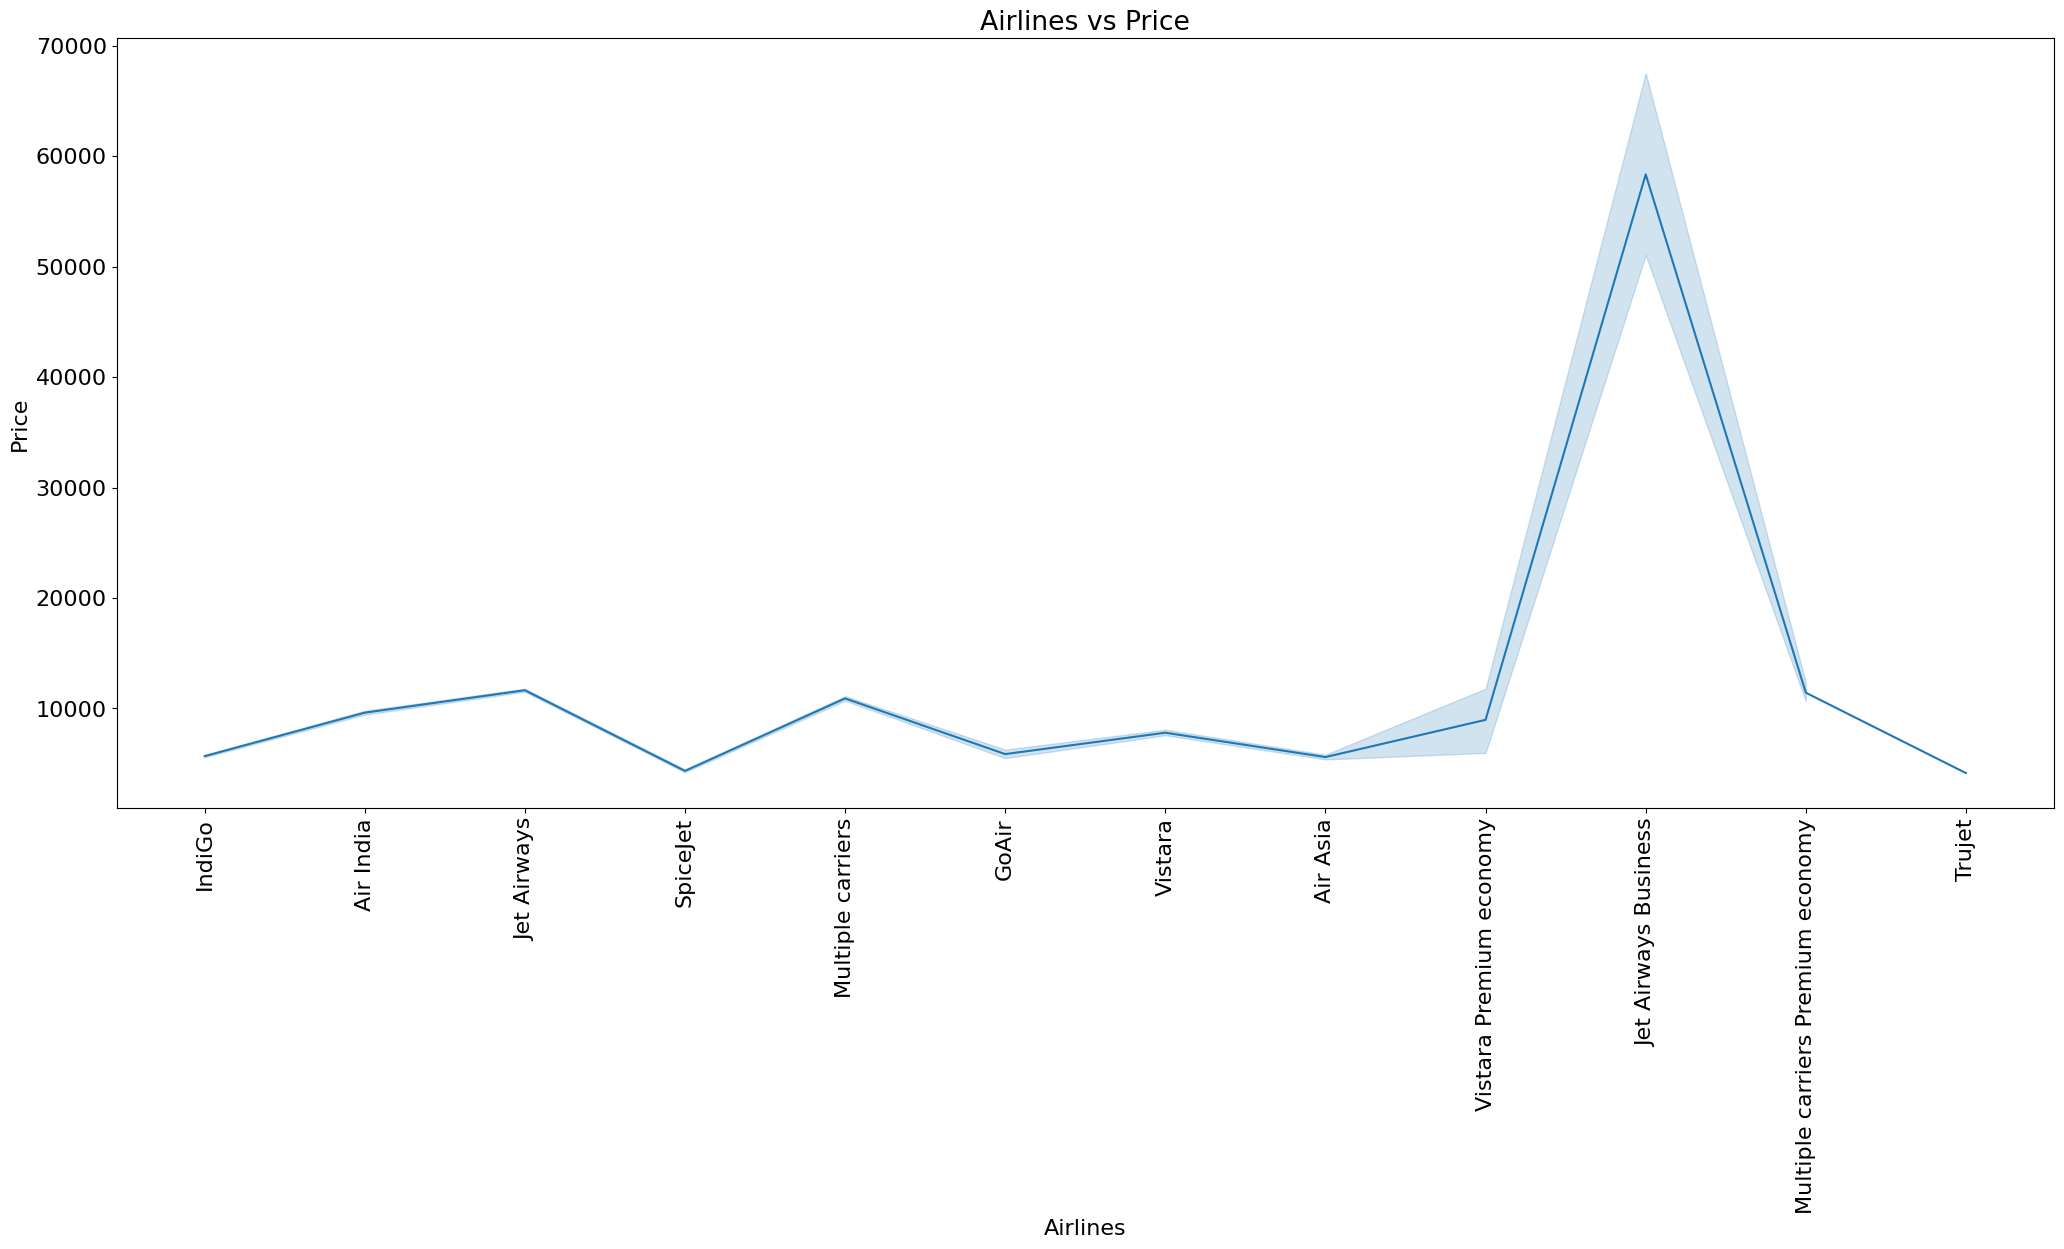

In [16]:
plt.figure(figsize=(25,10))
sns.lineplot(data=df, x='Airline', y='Price')
plt.xticks(rotation=90)
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.title('Airlines vs Price')

In [17]:
order = df.Source.value_counts().index.tolist()

### Analyze the number of flights per source

Text(0.5, 1.0, 'Number of Flights of Each Source')

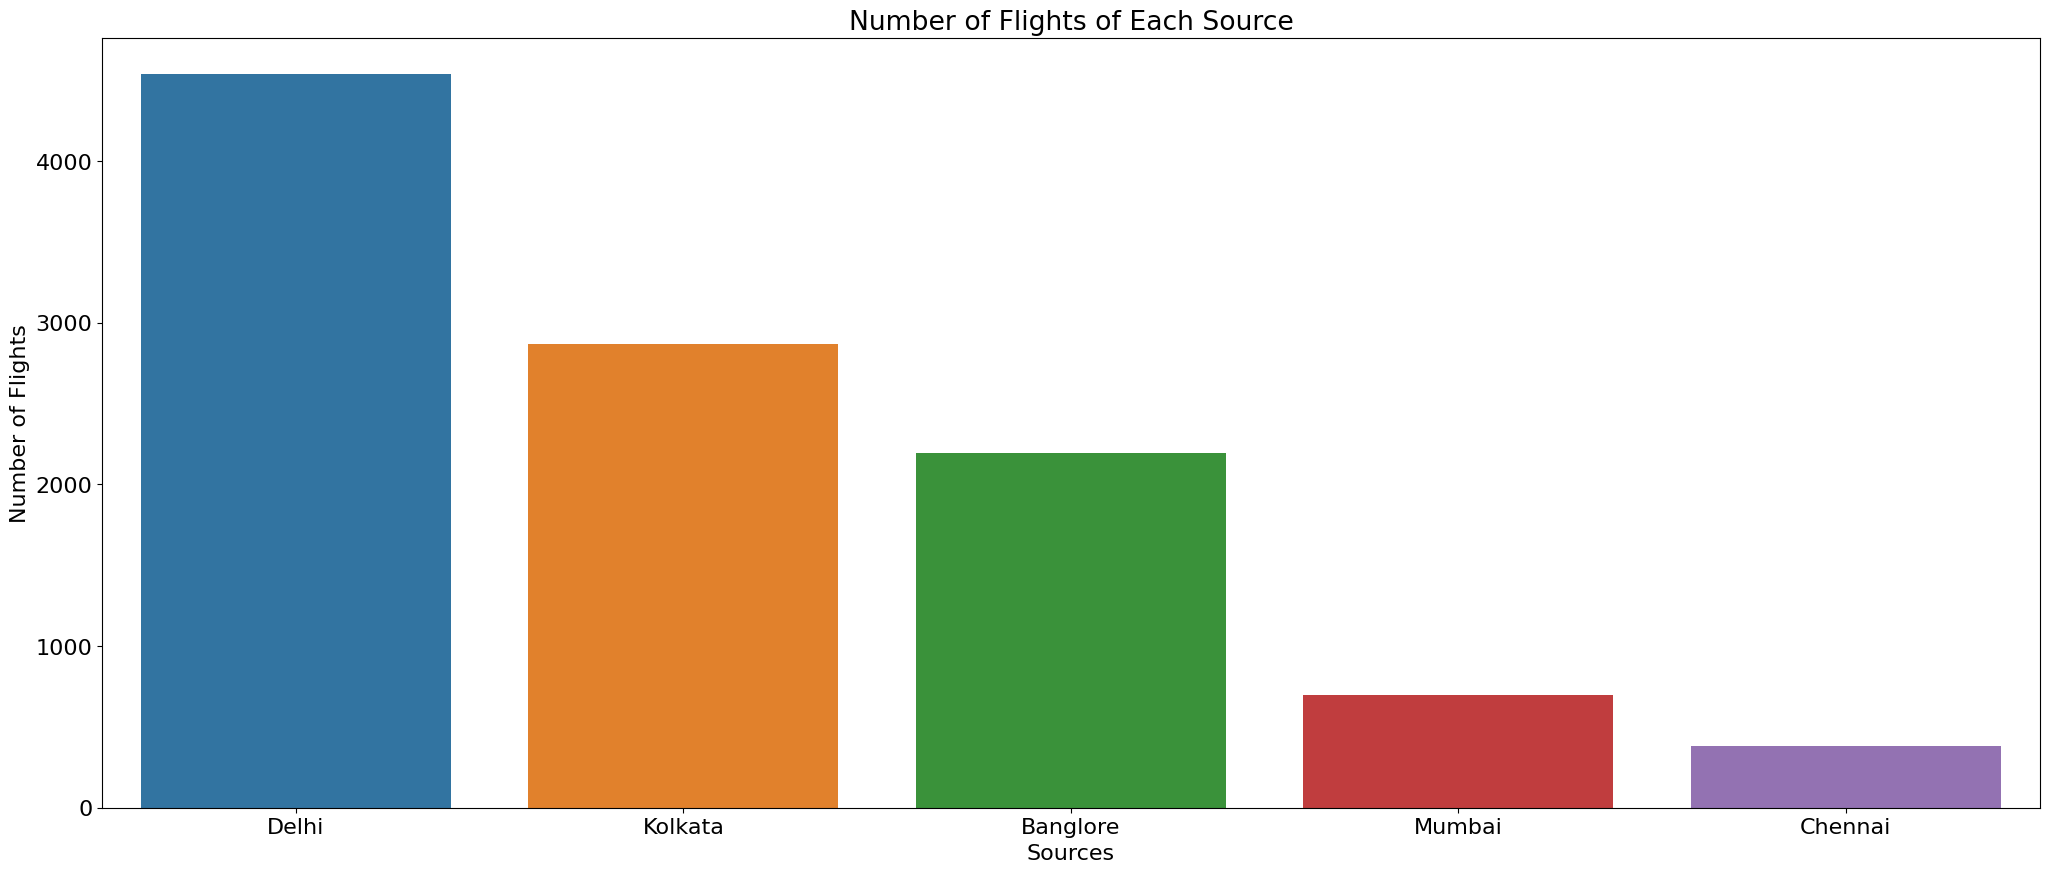

In [18]:
df.loc[df['Source']=='Delhi']
plt.figure(figsize=(25,10))
sns.countplot(data=df, x='Source', order=order)
plt.xlabel('Sources')
plt.ylabel('Number of Flights')
plt.title('Number of Flights of Each Source')

In [19]:
df[['Total_Stops', 'Price']]

,Total_Stops,Price
0,non-stop,3897
1,2 stops,7662
2,2 stops,13882
3,1 stop,6218
4,1 stop,13302
...,...,...
10678,non-stop,4107
10679,non-stop,4145
10680,non-stop,7229
10681,non-stop,12648


Text(0.5, 1.0, 'Total_Stops vs Price')

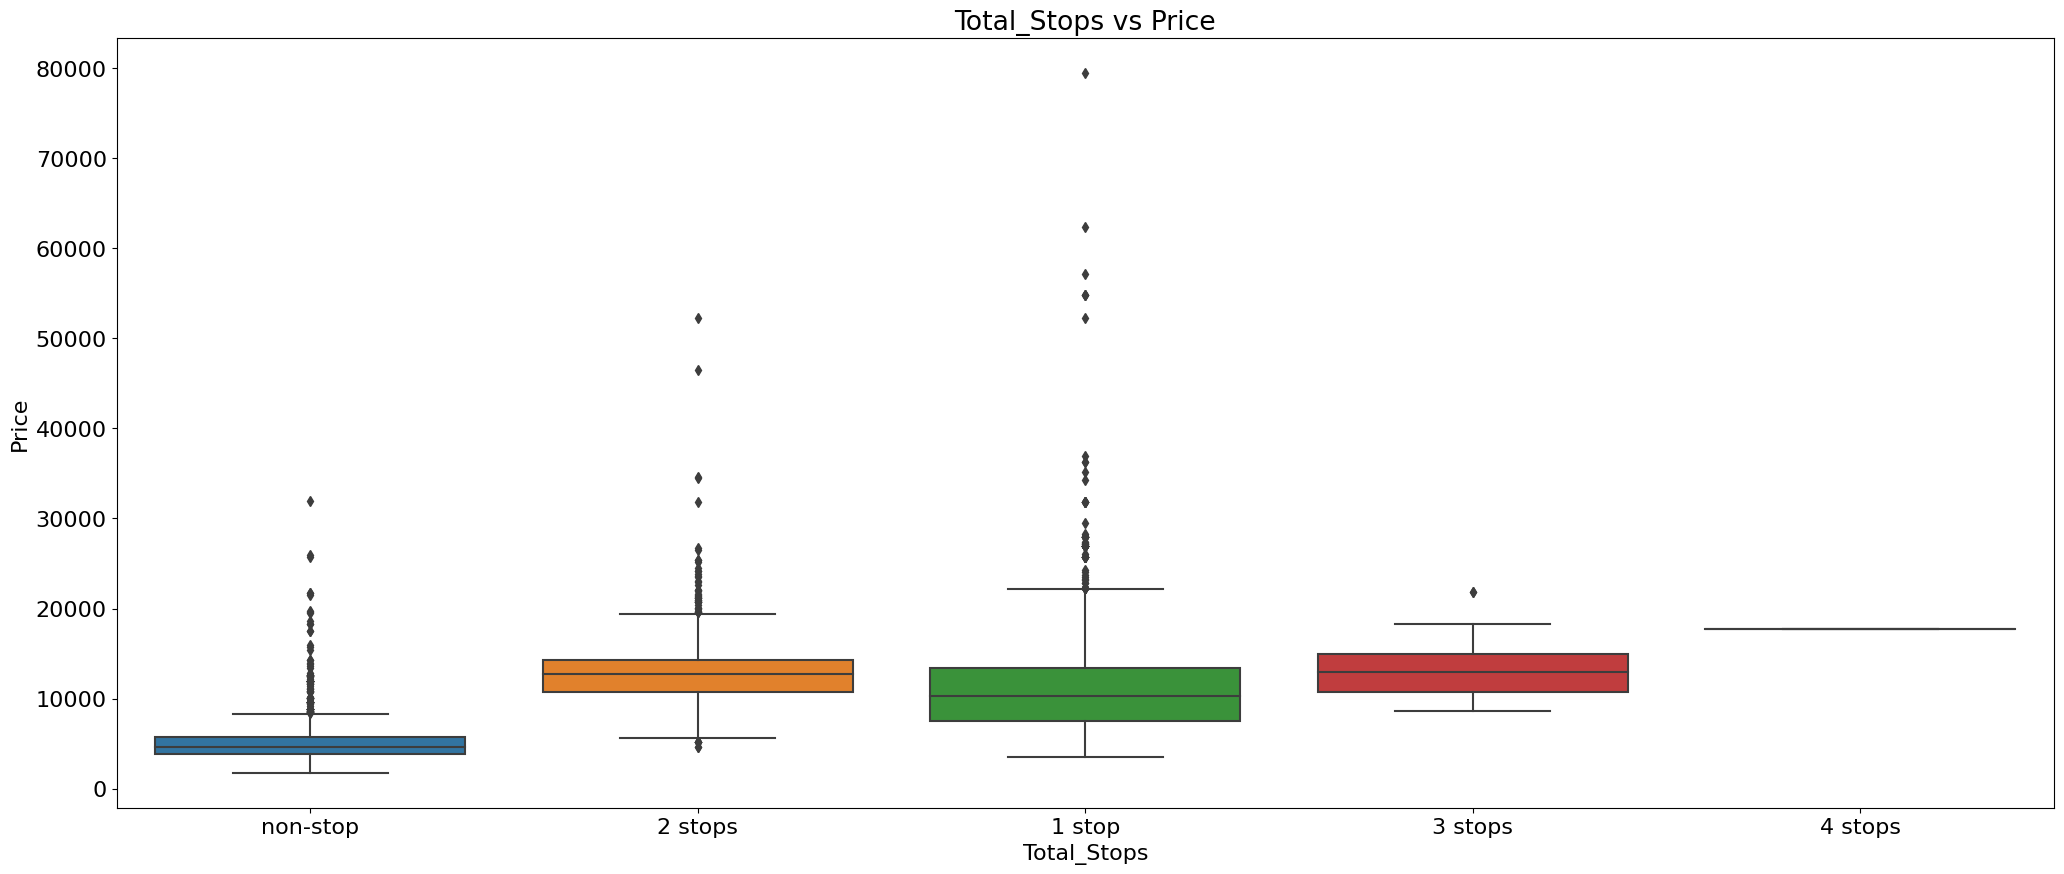

In [20]:
plt.figure(figsize=(25,10))
sns.boxplot(data=df, x='Total_Stops', y='Price')
plt.xlabel('Total_Stops')
plt.ylabel('Price')
plt.title('Total_Stops vs Price')

In [21]:
df.Additional_Info.value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [22]:
df['Additional_Info'] = df['Additional_Info'].replace('No Info', 'No Info')

In [23]:
df['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [24]:
print(df['Date_of_Journey'].min())
print(df['Date_of_Journey'].max())

01/03/2019
9/06/2019


In [25]:
#split by / and took the index we want.
#split fn is not a series fn, so we write it as str.split
df['Day_of_Journey'] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df['Month_of_Journey'] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df['Month_of_Journey']

0        3
1        5
2        6
3        5
4        3
        ..
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Month_of_Journey, Length: 10683, dtype: int32

In [26]:
df['Duration_in_min'] = df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [27]:
df['Duration_in_min']

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_in_min, Length: 10683, dtype: int64

In [28]:
df.Arrival_Time.value_counts()

19:00           423
21:00           360
19:15           333
16:10           154
12:35           122
               ... 
00:25 02 Jun      1
08:55 13 Mar      1
11:05 19 May      1
12:30 22 May      1
21:20 13 Mar      1
Name: Arrival_Time, Length: 1343, dtype: int64

In [29]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [30]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,170,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,445,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,1140,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,325,18,5,23,30
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,285,16,50,21,35


In [31]:
df.drop(['Dep_Time','Arrival_Time','Duration','Date_of_Journey'], axis=1, inplace=True)

In [32]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,285,16,50,21,35


In [33]:
df['Total_Stops'] = df['Total_Stops'].map({'non-stop':0, '1 stop':1, '2 stops':2, '3 stops': 3, '4 stops':4, '5 stops':5}).astype(int)

In [34]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,170,22,20,1,10
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,445,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,1140,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,325,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,285,16,50,21,35


In [35]:
df.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_25964\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Total_Stops,1.000000,0.603883,-0.009472,0.054389,0.738025,-0.061490,-0.002591,0.038123,-0.106939
Price,0.603883,1.000000,-0.153738,-0.103651,0.506371,0.006819,-0.024492,0.024264,-0.086155
Day_of_Journey,-0.009472,-0.153738,1.000000,-0.038378,-0.022562,0.002220,-0.008261,-0.003192,-0.017511
Month_of_Journey,0.054389,-0.103651,-0.038378,1.000000,0.014870,0.039112,-0.059238,-0.003941,-0.100626
Duration_in_min,0.738025,0.506371,-0.022562,0.014870,1.000000,0.002001,-0.018938,0.051434,-0.069653
Dep_hour,-0.061490,0.006819,0.002220,0.039112,0.002001,1.000000,-0.024806,0.005215,0.067909
Dep_min,-0.002591,-0.024492,-0.008261,-0.059238,-0.018938,-0.024806,1.000000,0.043054,-0.017594
Arrival_hour,0.038123,0.024264,-0.003192,-0.003941,0.051434,0.005215,0.043054,1.000000,-0.154362
Arrival_min,-0.106939,-0.086155,-0.017511,-0.100626,-0.069653,0.067909,-0.017594,-0.154362,1.000000


C:\Users\USER\AppData\Local\Temp\ipykernel_25964\3204280580.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

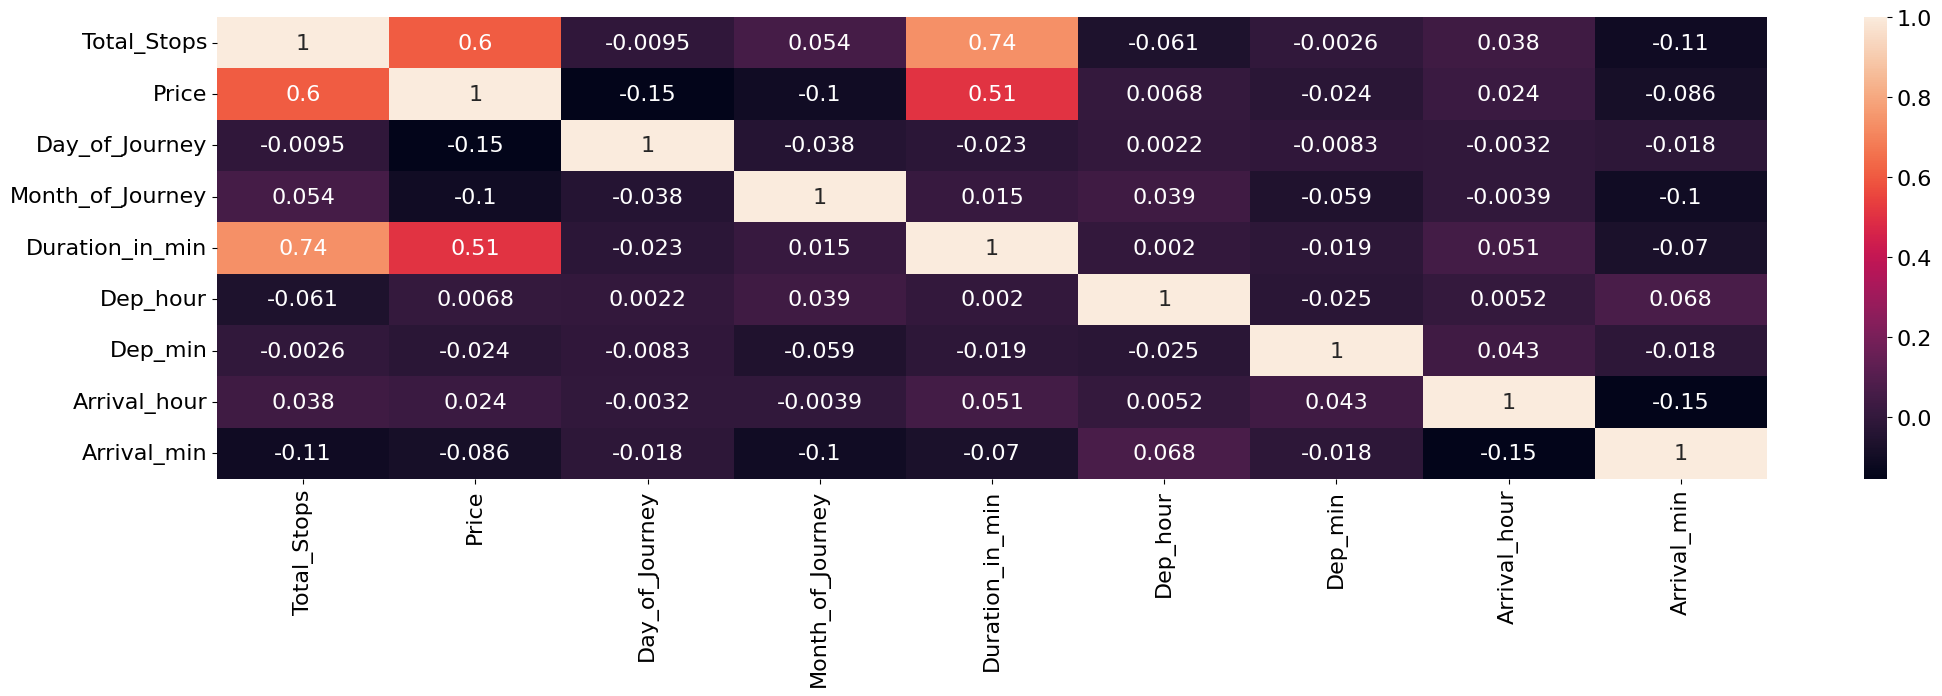

In [36]:
plt.figure(figsize=(25,6))
sns.heatmap(df.corr(), annot=True)

In [37]:
pd.set_option('display.max_row',81)
feature_corr = round(df.corr().unstack().sort_values(),3)
feature_corr

C:\Users\USER\AppData\Local\Temp\ipykernel_25964\2547343913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  feature_corr = round(df.corr().unstack().sort_values(),3)


Arrival_hour      Arrival_min        -0.154
Arrival_min       Arrival_hour       -0.154
Day_of_Journey    Price              -0.154
Price             Day_of_Journey     -0.154
Total_Stops       Arrival_min        -0.107
Arrival_min       Total_Stops        -0.107
Price             Month_of_Journey   -0.104
Month_of_Journey  Price              -0.104
Arrival_min       Month_of_Journey   -0.101
Month_of_Journey  Arrival_min        -0.101
Price             Arrival_min        -0.086
Arrival_min       Price              -0.086
Duration_in_min   Arrival_min        -0.070
Arrival_min       Duration_in_min    -0.070
Dep_hour          Total_Stops        -0.061
Total_Stops       Dep_hour           -0.061
Dep_min           Month_of_Journey   -0.059
Month_of_Journey  Dep_min            -0.059
Day_of_Journey    Month_of_Journey   -0.038
Month_of_Journey  Day_of_Journey     -0.038
Dep_hour          Dep_min            -0.025
Dep_min           Dep_hour           -0.025
Price             Dep_min       

In [38]:
print( feature_corr[(abs(feature_corr) >0.5) & (abs(feature_corr) <1) ].drop_duplicates() )

Price            Duration_in_min    0.506
Total_Stops      Price              0.604
Duration_in_min  Total_Stops        0.738
dtype: float64


In [52]:
plt.figure()

sns.pairplot(df[["Total_Stops","Day_of_Journey", "Month_of_Journey","Duration_in_min","Dep_hour","Dep_min","Arrival_hour","Arrival_min","Price"]], ,
palette = "dark" , diag_kind = "hist")
plt.show()

SyntaxError: invalid syntax (3171678582.py, line 3)

<Figure size 300x300 with 0 Axes>

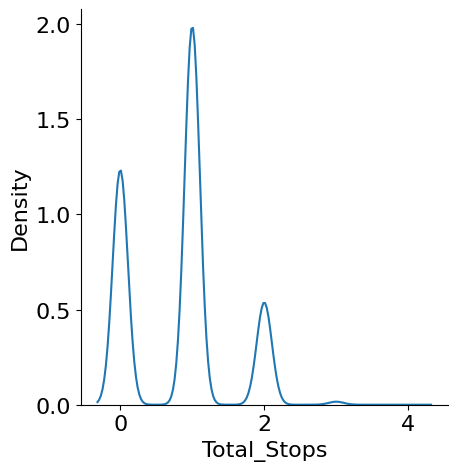

<Figure size 300x300 with 0 Axes>

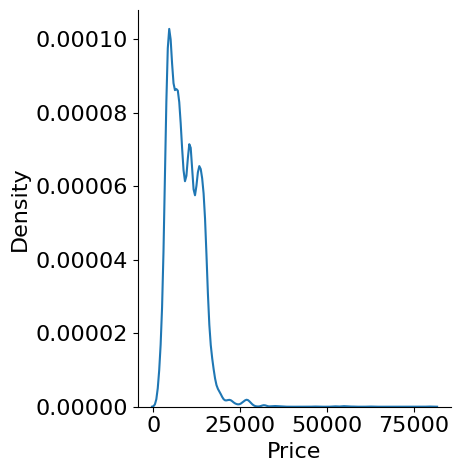

<Figure size 300x300 with 0 Axes>

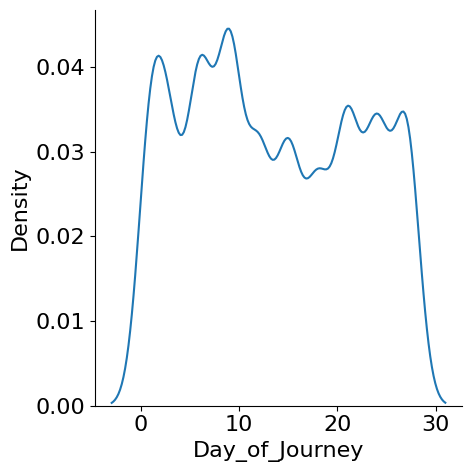

<Figure size 300x300 with 0 Axes>

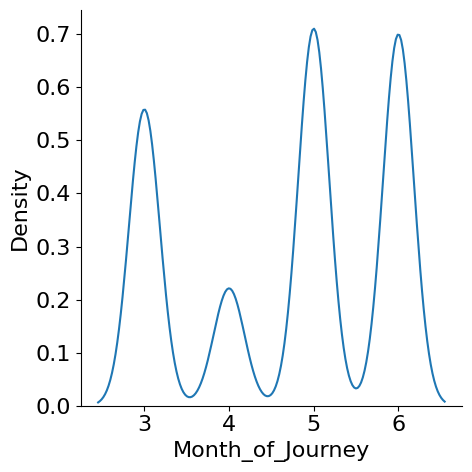

<Figure size 300x300 with 0 Axes>

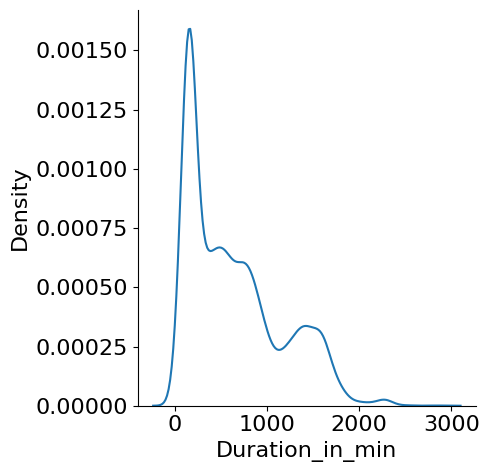

<Figure size 300x300 with 0 Axes>

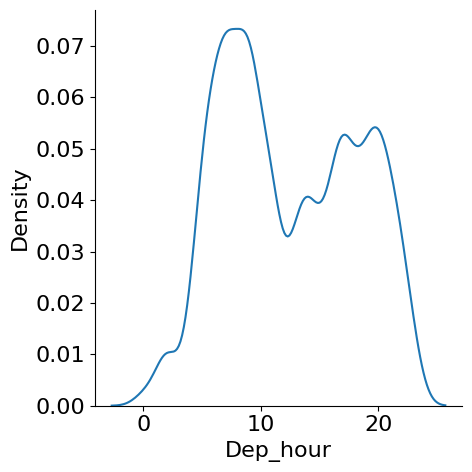

<Figure size 300x300 with 0 Axes>

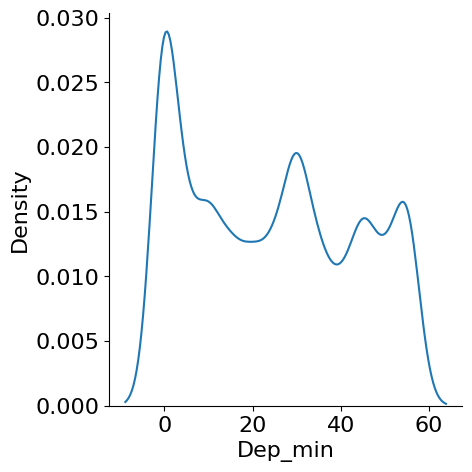

<Figure size 300x300 with 0 Axes>

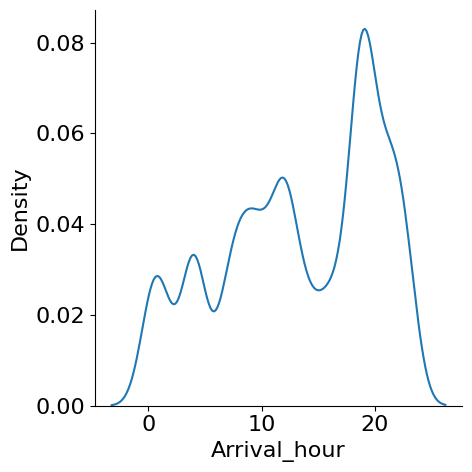

<Figure size 300x300 with 0 Axes>

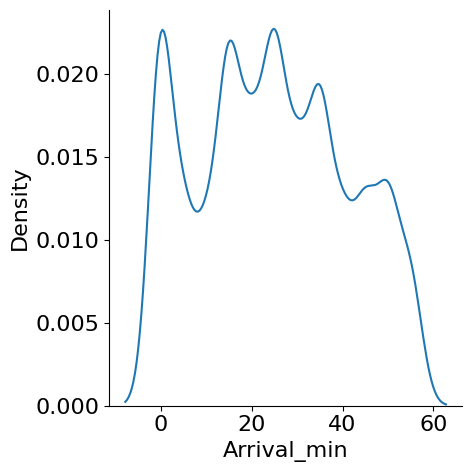

In [40]:

def dist_plots(feature):
    plt.figure(figsize = (3,3))
    sns.displot(df, x = feature, kind='kde')
    plt.show()

cont_features = df.columns[df.dtypes != 'object']

for feature in cont_features:
    dist_plots(feature)

In [41]:
data = df.select_dtypes(include = 'object')

In [42]:
data = pd.get_dummies(data, drop_first=True)
data

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0


In [43]:
data = pd.get_dummies(df , drop_first =True)
data

,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Duration_in_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Airline_Air India,...,Destination_New Delhi,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,3897,24,3,170,22,20,1,10,0,...,1,0,0,0,0,0,0,0,1,0
1,2,7662,1,5,445,5,50,13,15,1,...,0,0,0,0,0,0,0,0,1,0
2,2,13882,9,6,1140,9,25,4,25,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6218,12,5,325,18,5,23,30,0,...,0,0,0,0,0,0,0,0,1,0
4,1,13302,1,3,285,16,50,21,35,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,150,19,55,22,25,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,4145,27,4,155,20,45,23,20,1,...,0,0,0,0,0,0,0,0,1,0
10680,0,7229,27,4,180,8,20,11,20,0,...,0,0,0,0,0,0,0,0,1,0
10681,0,12648,1,3,160,11,30,14,10,0,...,1,0,0,0,0,0,0,0,1,0


In [44]:
X = data.drop(['Price','Duration_in_min'] , axis=1)
y = data[['Price']]

### Modeling

In [45]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

In [46]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7478, 36)
(3205, 36)
(7478, 1)
(3205, 1)


### Feature Scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
x_scale = MinMaxScaler().fit(X_train)
y_scale = MinMaxScaler().fit(y_train)

In [84]:
X_train_sc = x_scale.transform(X_train)
y_train_sc = y_scale.transform(y_train)

In [85]:
X_test_sc = x_scale.transform(X_test)
y_test_sc = y_scale.transform(y_test)

### Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_sc , y_train_sc)
ypred = lr.predict(X_test_sc)

In [88]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

mae = mean_absolute_error(y_test_sc , ypred)
rmse = math.sqrt(mean_squared_error(y_test_sc , ypred))

In [90]:
print('mae:',mae)
print('rmse:', rsquare)

mae: 0.023014515937334917
rmse: 0.0337493572477558


In [92]:
print('rsquare:', r2_score(y_test_sc, ypred)*100)

rsquare: 66.00602319480655


In [93]:
y_test_act = y_scale.inverse_transform(y_test_sc.reshape(-1,1))
y_pred_act = y_scale.inverse_transform(ypred.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_act, y_pred_act)
actual_rmse = np.sqrt(mean_squared_error(y_test_act, y_pred_act))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))
print("R-squared: ", r2_score(y_test_act, y_pred_act)*100)


Actual MAE =  1789
Actual RMSE =  2624
R-squared:  66.00602319480655


### Decision Tree Regressor

In [97]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train_sc)
dt_ypred = dt.predict(X_test_sc)

In [100]:
print('mae:', mean_absolute_error(y_test_sc, dt_ypred))
print('rmse:', math.sqrt(mean_squared_error(y_test_sc, dt_ypred)))
print('rsquare:', r2_score(y_test_sc, dt_ypred)*100)

mae: 0.009349076186755885
rmse: 0.023684307047620517
rsquare: 83.25857865193007


In [101]:
y_test_act = y_scale.inverse_transform(y_test_sc.reshape(-1,1))
dt_y_pred_act = y_scale.inverse_transform(dt_ypred.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_act, dt_y_pred_act)
actual_rmse = np.sqrt(mean_squared_error(y_test_act, dt_y_pred_act))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))
print("R-squared: ", r2_score(y_test_act, dt_y_pred_act)*100)

Actual MAE =  726
Actual RMSE =  1841
R-squared:  83.25857865193007


### Random Forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train_sc, y_train_sc)
rf_ypred = rf.predict(X_test_sc)

C:\Users\USER\AppData\Local\Temp\ipykernel_25964\2751457632.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_sc, y_train_sc)


In [103]:
print('mae:', mean_absolute_error(y_test_sc, rf_ypred))
print('rmse:', math.sqrt(mean_squared_error(y_test_sc, rf_ypred)))
print('rsquare:', r2_score(y_test_sc, rf_ypred)*100)

mae: 0.008570696393679992
rmse: 0.01883963950559268
rsquare: 89.40706912807805


In [104]:
y_test_act = y_scale.inverse_transform(y_test_sc.reshape(-1,1))
rf_y_pred_act = y_scale.inverse_transform(rf_ypred.reshape(-1,1))

actual_mae = mean_absolute_error(y_test_act, rf_y_pred_act)
actual_rmse = np.sqrt(mean_squared_error(y_test_act, rf_y_pred_act))

print('Actual MAE = ', int(actual_mae))
print('Actual RMSE = ', int(actual_rmse))
print("R-squared: ", r2_score(y_test_act, rf_y_pred_act)*100)

Actual MAE =  666
Actual RMSE =  1464
R-squared:  89.40706912807805
